 CNN ile FashionMNIST Görüntü Sınıflandırma (Keras)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
# FashionMNIST veri setini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)

# Normalizasyon (0-255 -> 0-1)
x_train = x_train / 255.0
x_test  = x_test / 255.0

# CNN için kanal boyutu ekle: (28,28) -> (28,28,1) siyah beyaz
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("Yeni Train shape:", x_train.shape)
print("Yeni Test shape :", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 185s 7us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)
Yeni Train shape: (60000, 28, 28, 1)
Yeni Test shape : (10000, 28, 28, 1)


## 2. Sınıf Etiketleri ve Örnek Görseller

FashionMNIST sınıfları aşağıdaki gibidir. Veri setinden örnek görüntüler görselleştirilmiştir.


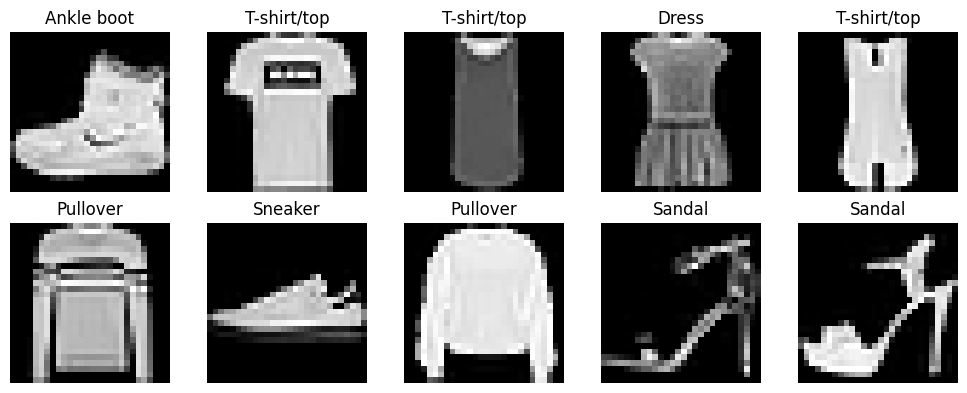

In [3]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()


## 3. CNN Modeli Kurulumu

Model mimarisi:
- Conv2D + MaxPooling2D katmanları ile özellik çıkarımı
- Flatten ile vektöre dönüştürme
- Dense katmanları ile sınıflandırma


In [4]:
def build_fashion_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

fashion_model = build_fashion_cnn()
fashion_model.summary()


c:\Users\Kocael\.conda\envs\veri_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Model Eğitimi (Train)

Model eğitiminde train verisinin %20’si validation olarak ayrılmıştır.


In [5]:
import datetime

log_dir = "logs/fashion_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1
)

history = fashion_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    callbacks=[tensorboard_callback]
)

print("TensorBoard log klasörü:", log_dir)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.8127 - loss: 0.5177 - val_accuracy: 0.8648 - val_loss: 0.3799
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.8754 - loss: 0.3432 - val_accuracy: 0.8884 - val_loss: 0.3146
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.8921 - loss: 0.2953 - val_accuracy: 0.8882 - val_loss: 0.3045
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9040 - loss: 0.2628 - val_accuracy: 0.8987 - val_loss: 0.2828
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9117 - loss: 0.2378 - val_accuracy: 0.9059 - val_loss: 0.2685
TensorBoard log klasörü: logs/fashion_20260203-173633


In [6]:
test_loss, test_acc = fashion_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.2876
Test Accuracy: 0.8947


## 6. Confusion Matrix ve Sınıflandırma 

Bu bölümde modelin hangi sınıflarda hata yaptığını görmek için Confusion Matrix oluşturulmuştur.
Ayrıca precision, recall ve f1-score değerleri raporlanmıştır.


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.92      0.83      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.83      0.86      0.85      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.87      0.79      0.83      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.73      0.62      0.67      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



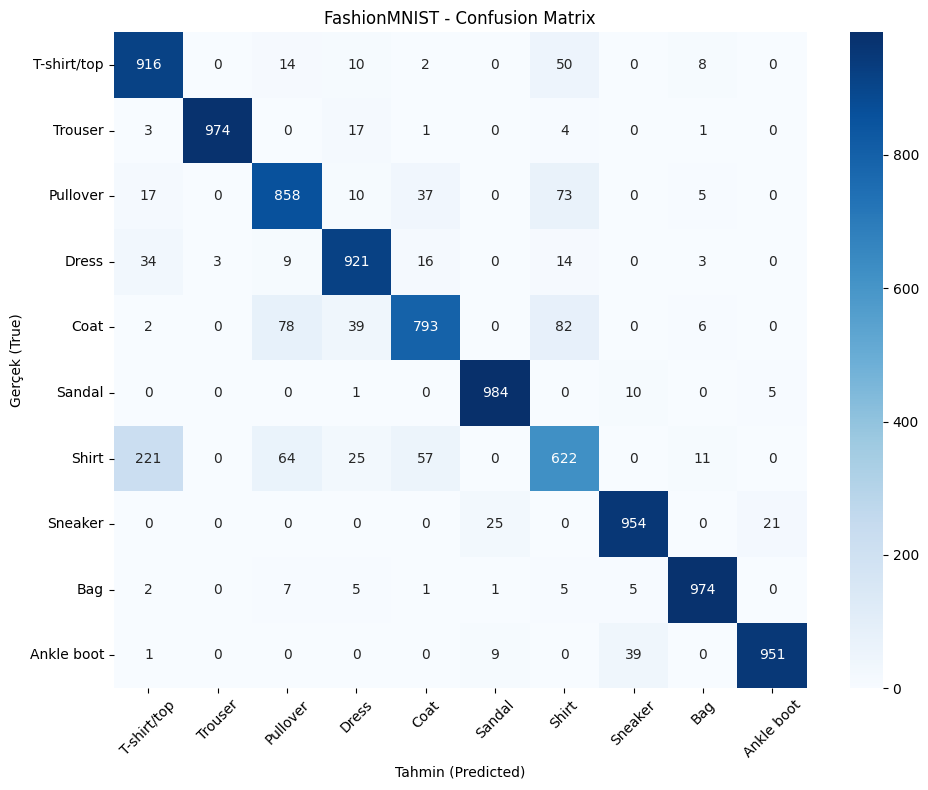

In [7]:
y_pred_probs = fashion_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("FashionMNIST - Confusion Matrix")
plt.xlabel("Tahmin (Predicted)")
plt.ylabel("Gerçek (True)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


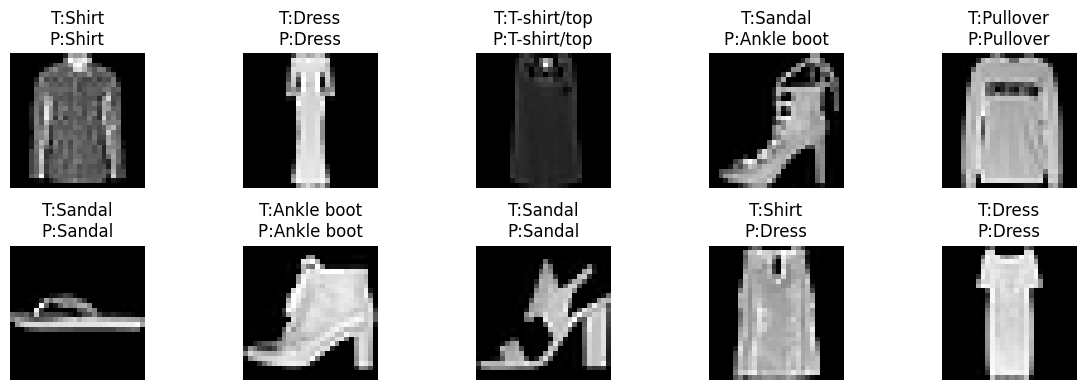

In [8]:
np.random.seed(42)
indices = np.random.choice(len(x_test), 10, replace=False)

plt.figure(figsize=(12,4))
for i, idx in enumerate(indices):
    img = x_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    plt.subplot(2,5,i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"T:{class_names[true_label]}\nP:{class_names[pred_label]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [10]:
%reload_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 15060), started 0:00:53 ago. (Use '!kill 15060' to kill it.)

## Sonuç 

Bu çalışmada FashionMNIST veri seti kullanılarak CNN tabanlı bir görüntü sınıflandırma modeli geliştirilmiştir. 
Model test verisi üzerinde yüksek doğruluk elde etmiş, 
Confusion Matrix ve sınıflandırma raporu sayesinde sınıflar bazında performans incelenmiştir. 
TensorBoard ile eğitim süreci görselleştirilerek loss ve accuracy değerlerinin epoch bazındaki değişimi takip edilmiştir.

Ayrıca TensorBoard sayesinde scalars butonundan grafikler görüntülenebilir ve yorumlanabilir hale gelmiştir.